In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.imdb import load_data, get_word_index
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

## 1.1. Nạp dữ liệu

In [32]:
n_words =  300
(X_train,y_train),(X_test,y_test) = load_data(num_words = n_words)
n_train_size = X_train.shape[0]

In [33]:
#Xem thông tin về datasets
print("-"*50)
print("Training data X shape:{}".format(len(X_train)))
print("Training data y shape:{}".format(len(y_train)))
print("-"*50)
print("Testing data X shape{}".format(len(X_test)))
print("Testing data y shape{}".format(len(y_test)))# Dataset chia 50-50 mặc định

--------------------------------------------------
Training data X shape:25000
Training data y shape:25000
--------------------------------------------------
Testing data X shape25000
Testing data y shape25000


## 1.2. Khám phá dữ liệu

In [34]:
n_cat = pd.Series(y_train).nunique()
n_cat

2

In [36]:
print(X_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [37]:
#Hiển thị độ dài của 100 document đầu
print([len(a) for a in X_train[0:100]])

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171]


In [38]:
#Tải từ điền đề mapping với value
my_dict = get_word_index(path='imdb_word_index.json')

In [41]:
my_dict_inv = {v:k for k,v in my_dict.items()}
i_reviews = 10
review = list(pd.Series(X_train[i_reviews]).apply(lambda x: my_dict_inv[x]))
print(' '.join(review))

the and fact and there life back br is and show of performance and br actors film him many should movie and to and and and are in of scenes and and of and out and not and and to and show its and fact and to it and by br of where and fact many your way and with and and are is and and not as it way she but this anything up and been by who of and br of you to as this and it and who of and and to love for and of you it is and of little and are seen watched and and to and and of and being it is say and and and in and but and all it maybe this is and film job and of and and and and and and and to be and and and watch is and go this of and american from and and is and put this of and for and so work and watch and lot br that from and and make and and to and from action at and in and that in and i'm of and and i i and and it is time done and to watching look world and for more and up many and are that movie music her get and but seems in people film that if and in why for and find of where br 

## 1.3. Tiền xử lý dữ liệu

In [58]:
#padding và giới hạn vector có độ dài bằng 100
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

## 1.4. Định nghĩa mô hình

In [47]:
n_neurons = 50
n_input = 100
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))
my_model.add(LSTM(units = n_neurons, return_sequences = False, input_shape=(None, n_input),activation='tanh'))
my_model.add(Dense(1, activation = 'sigmoid'))

In [48]:
my_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 1.5 Khởi tạo hyperparameter


In [53]:
n_epochs = 5
batch_size = 50
learn_rate = 0.002
my_optimizer = Adam(learning_rate = learn_rate)
my_model.compile(loss = "binary_crossentropy", optimizer = my_optimizer, metrics =["accuracy"])

## 1.6. Huấn luyện mô hình


In [55]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size,validation_split=0.2, verbose = 1)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8085 - loss: 0.4168 - val_accuracy: 0.7642 - val_loss: 0.4921
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8211 - loss: 0.3906 - val_accuracy: 0.7728 - val_loss: 0.4688
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8249 - loss: 0.3842 - val_accuracy: 0.7714 - val_loss: 0.4640
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8354 - loss: 0.3673 - val_accuracy: 0.7648 - val_loss: 0.4795
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8385 - loss: 0.3584 - val_accuracy: 0.7738 - val_loss: 0.4988
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8563 - loss: 0.3321 - val_accuracy: 0.7740 - val_loss: 0.4827
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8599 - loss: 0.3190 - val_accuracy: 0.7716 - val_loss: 0.5022
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8657 - loss: 0.3062 - val_accu

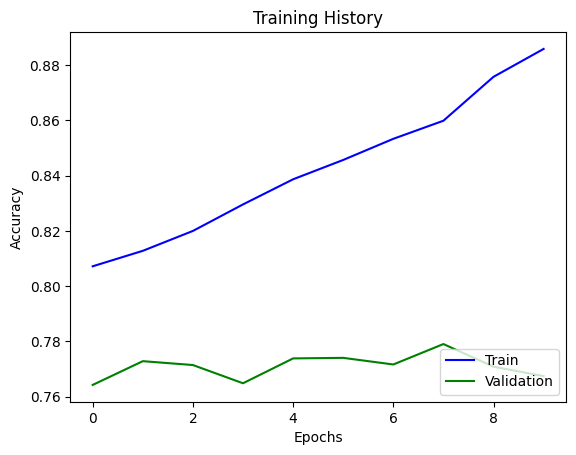

In [56]:
plt.plot(my_summary.history['accuracy'],c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title("Training History")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'],loc = 'lower right')
plt.show()

In [59]:
ACC = my_model.evaluate(X_test, y_test, verbose = 1)[1]
print("Tesst Accuracy: {}".format(np.round(ACC,3)))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7683 - loss: 0.5757
Tesst Accuracy: 0.774
